<h3 style="color:red;">Term neonate of 40 weeks of gestation and 3.5 kg at 24 hours</h3>


 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.5 sec. Average model step in 0.0295 ms.
Heart.heart_rate: max  110.85505 min  109.41993
AA.pres         : max   65.87811, min    39.8986 mmHg
PA.pres         : max   43.67724, min   17.96409 mmHg
LV_AA.flow      : net  177.32335, forward  177.32335, backward        0.0 ml/kg/min, stroke volume:    1.61202 ml/kg, 
RV_PA.flow      : net  181.30901, forward  181.30901, backward        0.0 ml/kg/min, stroke volume:    1.64825 ml/kg, 
SVC_RA.flow     : net   77.01089, forward   83.93669, backward    -6.9258 ml/kg/min, stroke volume:    0.70009 ml/kg, 
AAR_AD.flow     : net   98.27424, forward  100.38411, backward   -2.10987 ml/kg/min, stroke volume:    0.89339 ml/kg, 
LV.vol          : max    2.56519, min     0.8979 ml/kg
RV.vol          : max    3.40169, min    1.45379 ml/kg


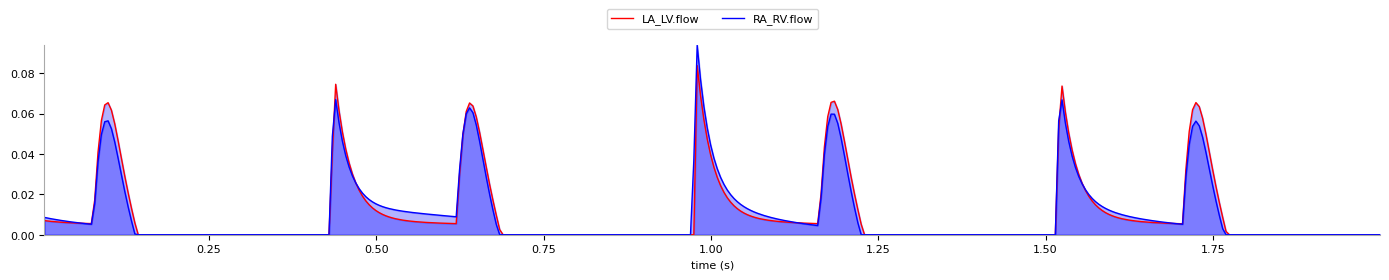

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  606.66177, forward  606.66177, backward        0.0 ml/min, stroke volume:     5.4781 ml, 
RA_RV.flow      : net  598.93222, forward  598.93222, backward        0.0 ml/min, stroke volume:     5.4083 ml, 


In [1]:
# as this notebook is run from a subfolder, we need to change the working directory to the root folder
import os

if os.getcwd().split("/")[-1] != "explain-python":
    os.chdir("..")

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine

# instantiate a model engine instance with the 'baseline_neonate' model definition
model = ModelEngine("definitions/baseline_neonate.json")

# report the gas pressures in kPa
model.set_pressure_unit("kpa")

# get a reference to all the submodels
models = model.models

# instantiate a custom interface object especially designed to interact with the neonatal model engine instance
from interfaces.NeoInterface import NeoInterface

neo = NeoInterface(model)

# enable or disable the physiological submodels which can be enabled or disabled.
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(False)
neo.pda(False)

# enable or disable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.resuscitation(False)

# stabilize the model by calculating 60 seconds
neo.calculate(60)

<h5 style="color:red;">Model run results</h5>

<h5 style="color:red;">Blood flows and volumes target data</h5>
<a href="https://pubmed.ncbi.nlm.nih.gov/37095534/">Jhaveri S, Battersby E, Stern KWD, Cohen J, Yang Y, Price A, Hughes E, Poston L, Pasupathy D, Taylor P, Vieira MC, Groves A. Normative ranges of biventricular volumes and function in healthy term newborns. J Cardiovasc Magn Reson. 2023 Apr 24;25(1):26. doi: 10.1186/s12968-023-00932-1. PMID: 37095534; PMCID: PMC10127416.</a><br>
<img src="../documentation/images/JhaveriTable2LV.jpg" width="400" height="500"></img>
<img src="../documentation/images/JhaveriTable3RV.jpg" width="400" height="500"></img><br>

<a href="https://pubmed.ncbi.nlm.nih.gov/20971721/">Groves AM, Chiesa G, Durighel G, Goldring ST, Fitzpatrick JA, Uribe S, Razavi R, Hajnal JV, Edwards AD. Functional cardiac MRI in preterm and term newborns. Arch Dis Child Fetal Neonatal Ed. 2011 Mar;96(2):F86-91. doi: 10.1136/adc.2010.189142. Epub 2010 Oct 21. PMID: 20971721; PMCID: PMC3093932.</a><br>
<img src="../documentation/images/GrovesFigure3.jpg" width="600" height="480"></img>
<img src="../documentation/images/GrovesFigure5.jpg" width="600" height="480"></img><br> -->
<!-- <img src="../documentation/images/GrovesTable1.jpg" width="300" height="100"></img>
<img src="../documentation/images/GrovesTable3.jpg" width="280" height="100"></img>



<h5 style="color:red;">Blood pressure target data</h5>


<a href="https://pubmed.ncbi.nlm.nih.gov/36858885/">van Zadelhoff AC, Poppe JA, Willemsen S, Mauff K, van Weteringen W, Goos TG, Reiss IKM, Vermeulen MJ, de Graaff JC. Age-dependent changes in arterial blood pressure in neonates during the first week of life: reference values and development of a model. Br J Anaesth. 2023 May;130(5):585-594. doi: 10.1016/j.bja.2023.01.024. Epub 2023 Feb 28. PMID: 36858885.</a><br><br>
<img src="../documentation/images/ZadelhoffSystolicFigure4.jpg" width="600" height="650"></img>
<img src="../documentation/images/ZadelhoffDiastolicFigure4.jpg" width="600" height="650"></img><br>

In [ ]:
neo.calculate(60)
neo.get_total_blood_volume()
neo.get_vitals()

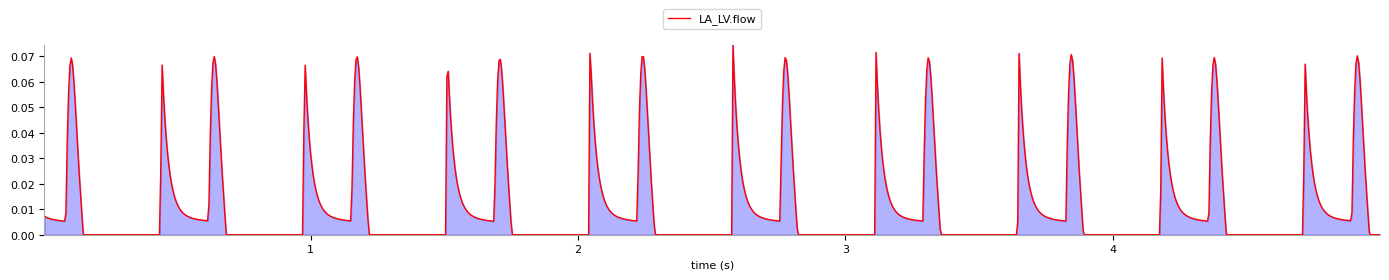

Stroke volume calculation might be inaccurate. Try using a sampleinterval of 0.0005
LA_LV.flow      : net  635.76356, forward  635.76356, backward        0.0 ml/min, stroke volume:    5.66754 ml, 


In [14]:
neo.plot_time_graph(["LA_LV.flow"], time_to_calculate=5)

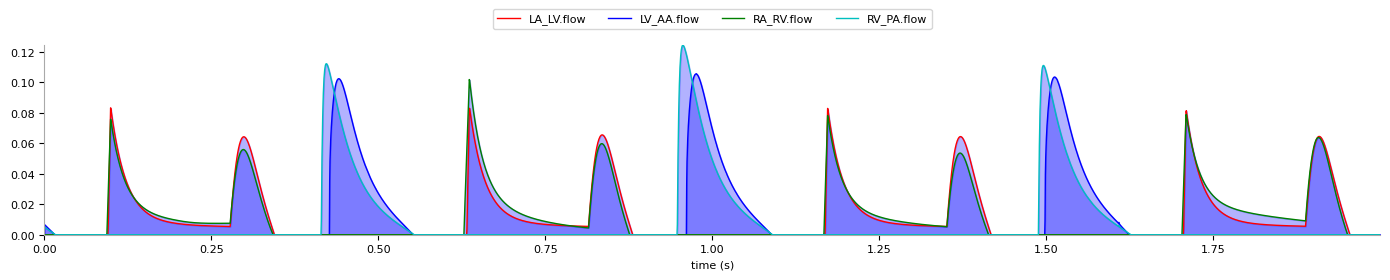

In [31]:
neo.plot_heart_flows()

In [2]:
model.save_model_state_json("model_state.json")

Processing model: LA - {'name': 'LA', 'description': 'left atrium', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol': 0.007824975926284438, 'u_vol': 0.0, 'el_min': 1260, 'el_max': 3280, 'el_k': 0}
Processing model: RA - {'name': 'RA', 'description': 'right atrium', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol': 0.007824975926284438, 'u_vol': 0.0, 'el_min': 1260, 'el_max': 3280, 'el_k': 0}
Processing model: LV - {'name': 'LV', 'description': 'left ventricle', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol': 0.0055155539340687116, 'u_vol': 0.00067, 'el_min': 1222, 'el_max': 28957, 'el_k': 0}
Processing model: RV - {'name': 'RV', 'description': 'right ventricle', 'model_type': 'BloodTimeVaryingElastance', 'category': 'heart_chambers', 'is_enabled': True, 'dependencies': [], 'vol